In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
torch.backends.cudnn.enabled

True

# MNIST CNN: Preprocessing

In [5]:
path = untar_data(URLs.MNIST)

In [6]:
path.ls()

[PosixPath('/home/luan/.fastai/data/mnist_png/models'),
 PosixPath('/home/luan/.fastai/data/mnist_png/training'),
 PosixPath('/home/luan/.fastai/data/mnist_png/testing')]

In [7]:
il = ImageList.from_folder(path, convert_mode="L")

In [8]:
il.items[0]

PosixPath('/home/luan/.fastai/data/mnist_png/training/0/22764.png')

In [9]:
defaults.cmap = 'binary'

In [10]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/luan/.fastai/data/mnist_png

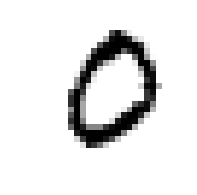

In [13]:
il[2].show()

In [14]:
sd = il.split_by_folder(train='training', valid='testing')

In [15]:
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/luan/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/luan/.fastai/data/mnist_png;

Test: None

In [16]:
(path/'training').ls()

[PosixPath('/home/luan/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/luan/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/luan/.fastai/data/mnist_png/training/3'),
 PosixPath('/home/luan/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/luan/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/luan/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/luan/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/luan/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/luan/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/luan/.fastai/data/mnist_png/training/5')]

In [17]:
ll = sd.label_from_folder()

In [18]:
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
0,0,0,0,0
Path: /home/luan/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
0,0,0,0,0
Path: /home/luan/.fastai/data/mnist_png;

Test: None

In [19]:
x, y = ll.train[0]

0 torch.Size([1, 28, 28])


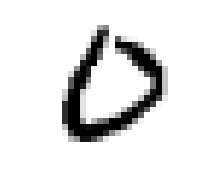

In [20]:
x.show()
print(y, x.shape)

In [21]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

In [22]:
ll = ll.transform(tfms)

In [23]:
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
0,0,0,0,0
Path: /home/luan/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
0,0,0,0,0
Path: /home/luan/.fastai/data/mnist_png;

Test: None

In [24]:
bs = 128

In [25]:
# not using imagenet_stats because not using pretrained model
data = ll.databunch(bs=bs).normalize()

In [26]:
x, y = data.train_ds[0]

0


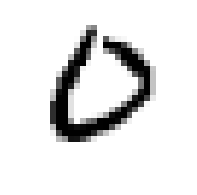

In [27]:
x.show()
print(y)

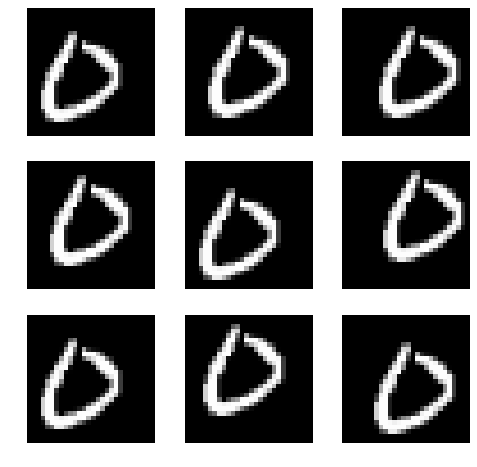

In [28]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [29]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [30]:
xb[0].tolist()


[[[0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0

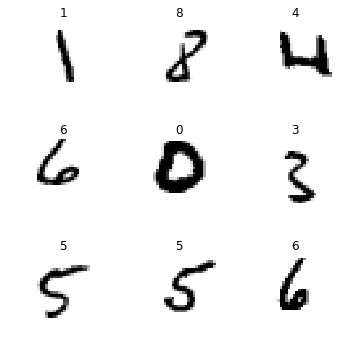

In [31]:
data.show_batch(rows=3, figsize=(5,5))

# Model: CNN with BatchNorm

In [32]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [33]:
model = nn.Sequential(
            conv(1, 8),  # 14
            nn.BatchNorm2d(8),
            nn.ReLU(),
            conv(8, 16), # 7
            nn.BatchNorm2d(16),
            nn.ReLU(),
            conv(16, 32), # 4
            nn.BatchNorm2d(32),
            nn.ReLU(),
            conv(32, 16), # 2
            nn.BatchNorm2d(16),
            nn.ReLU(),
            conv(16, 10), # 1
            nn.BatchNorm2d(10),
            Flatten()
)

In [34]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [35]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
______________________________________________________________

In [36]:
xb = xb.cuda()

In [38]:
xb.shape

torch.Size([128, 1, 28, 28])

In [40]:
model(xb).shape

torch.Size([128, 10])

In [41]:
model(xb)

tensor([[ 0.0006,  0.0315,  0.0480,  ..., -0.0070, -0.0144, -0.0177],
        [ 0.0004,  0.0312,  0.0479,  ..., -0.0070, -0.0145, -0.0179],
        [ 0.0006,  0.0312,  0.0480,  ..., -0.0070, -0.0143, -0.0175],
        ...,
        [ 0.0005,  0.0313,  0.0478,  ..., -0.0070, -0.0147, -0.0181],
        [ 0.0005,  0.0312,  0.0479,  ..., -0.0070, -0.0146, -0.0178],
        [ 0.0004,  0.0315,  0.0479,  ..., -0.0070, -0.0142, -0.0176]],
       device='cuda:0', grad_fn=<ViewBackward>)

In [42]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


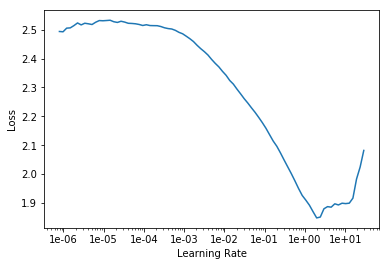

In [43]:
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(3, max_lr=1e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.240525,0.113605,0.965700,04:10
1,0.127008,0.086211,0.971700,00:05
2,0.072354,0.039135,0.988000,00:05


## Refactor

In [45]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [46]:
model = nn.Sequential(
    conv2(1, 8),   # 14
    conv2(8, 16),  # 7
    conv2(16, 32), # 4
    conv2(32, 16), # 2
    conv2(16, 10), # 1
    Flatten()      # remove (1,1) grid
)

In [47]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [48]:
learn.fit_one_cycle(15, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.241501,0.145179,0.956900,00:05
1,0.174641,0.138618,0.954700,00:05
2,0.174288,0.087066,0.971300,00:05
3,0.147263,0.251184,0.921600,00:05
4,0.136533,0.121956,0.958900,00:05
5,0.128240,0.162863,0.947000,00:05
6,0.122130,0.065263,0.980900,00:05
7,0.101519,0.077324,0.975800,00:05
8,0.094672,0.090763,0.970900,00:05
9,0.081336,0.059134,0.983600,00:05


# Resnet-ish block :D

<img src='images/Resnet.png' />

A sample for Pytorch Module: https://pytorch.org/docs/stable/nn.html#torch.nn.Module

In [52]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [63]:
conv2

<function __main__.conv2(ni, nf)>

In [53]:
model = nn.Sequential(
    conv2(1, 8),
    ResBlock(8),
    conv2(8, 16),
    ResBlock(16),
    conv2(16, 32),
    ResBlock(32),
    conv2(32, 16),
    ResBlock(16),
    conv2(16, 10),
    Flatten()
)

In [56]:
def conv_and_res(ni, nf): return nn.Sequential(conv2(ni, nf), ResBlock(nf))

In [57]:
model = nn.Sequential(
    conv_and_res(1, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, 10),
    Flatten()
)

In [58]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


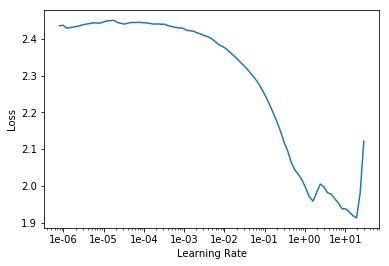

In [59]:
learn.lr_find(end_lr=100)
learn.recorder.plot()

In [60]:
learn.fit_one_cycle(12, max_lr=3e-01)

epoch,train_loss,valid_loss,accuracy,time
0,0.172407,0.710588,0.798100,00:06
1,0.149414,0.579637,0.839300,00:05
2,0.161714,0.304738,0.894500,00:06
3,0.128888,0.183913,0.940900,00:06
4,0.140784,0.166903,0.949200,00:06
5,0.105369,0.178723,0.944900,00:06
6,0.097275,0.190472,0.942600,00:06
7,0.081039,0.140490,0.954000,00:06
8,0.064028,0.050953,0.983500,00:06
9,0.045500,0.034476,0.989000,00:06


Fastai has a resnet block called `res_block`

In [61]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          72         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
______________________________________________________________